In [2]:
# -*- coding: utf-8 -*-
import math
import pandas as pd
import sklearn
import numpy as np
from pyearth import Earth
import matplotlib.pyplot as pyplot 
import seaborn as sns
from scipy.stats import skew, skewtest

train = pd.read_csv("/home/saikat/Documents/2020/Project/Dataset_ML_reg.csv")
test = pd.read_csv("/home/saikat/Documents/2020/Project/Dataset_ML_reg_test.csv")

train.describe()


,year,month,day,day_week,close_norm,open_norm,high_norm,low_norm,range_norm
count,2610.000000,2610.000000,2610.000000,2610.000000,2610.000000,2610.000000,2610.000000,2610.000000,2610.000000
mean,2013.491571,6.528736,15.736398,3.999234,0.000784,0.000779,0.000746,0.000780,0.154307
std,2.876286,3.450040,8.803216,1.413942,0.015480,0.016098,0.014235,0.015184,0.718611
min,2008.000000,1.000000,1.000000,2.000000,-0.084211,-0.096846,-0.080913,-0.123607,-2.114471
25%,2011.000000,4.000000,8.000000,3.000000,-0.006747,-0.007242,-0.005541,-0.006241,-0.303697
50%,2013.000000,7.000000,16.000000,4.000000,0.000073,0.000000,0.000149,0.000000,0.000000
75%,2016.000000,10.000000,23.000000,5.000000,0.008141,0.008686,0.006842,0.007603,0.396617
max,2018.000000,12.000000,31.000000,6.000000,0.188146,0.142209,0.192929,0.142209,7.958861


In [3]:
train.isnull().values.any()

False

In [4]:
y_train = train['close_norm']
print(y_train)

0       0.034346
1       0.021851
2      -0.011981
3       0.022993
4       0.015352
          ...   
2605   -0.005765
2606    0.000000
2607    0.010184
2608   -0.004011
2609    0.009178
Name: close_norm, Length: 2610, dtype: float64


In [5]:
X_train = train.drop(['close_norm'], axis=1)
print(X_train)

      year  month  day  day_week  open_norm  high_norm  low_norm  range_norm
0     2008     12   29         2  -0.038202  -0.014263 -0.017903    0.049852
1     2008     12   30         3   0.044757   0.028949  0.052009   -0.351038
2     2008     12   31         4   0.021239   0.001252  0.010713   -0.251491
3     2009      1    1         5  -0.014752   0.003086  0.007619   -0.160391
4     2009      1    2         6   0.026897   0.024050  0.016815    0.337214
...    ...    ...  ...       ...        ...        ...       ...         ...
2605  2018     12   24         2  -0.014093  -0.015866 -0.005449   -0.527656
2606  2018     12   25         3   0.000000   0.000000  0.000000    0.000000
2607  2018     12   26         4  -0.009043   0.003501 -0.010076    1.407910
2608  2018     12   27         5   0.021275   0.007799  0.016546   -0.364171
2609  2018     12   28         6  -0.005597  -0.000973  0.007245   -0.559706

[2610 rows x 8 columns]


In [6]:
y_test = test['close_norm']
print(y_test)

0      0.001288
1      0.008549
2     -0.007947
3     -0.007906
4      0.008722
         ...   
255   -0.001405
256   -0.001815
257    0.000000
258    0.000000
259    0.004077
Name: close_norm, Length: 260, dtype: float64


In [7]:
X_test = test.drop(['close_norm'], axis=1)
print(X_test)

     year  month  day  day_week  open_norm  high_norm  low_norm  range_norm
0    2018     12   31         2   0.008111   0.002684  0.002419    0.044003
1    2019      1    1         3  -0.001335   0.005279 -0.003171    1.267218
2    2019      1    2         4   0.002409  -0.001203  0.002167   -0.222479
3    2019      1    3         5  -0.004228  -0.006984 -0.005682   -0.117206
4    2019      1    4         6  -0.006692   0.002510  0.000087    0.233493
..    ...    ...  ...       ...        ...        ...       ...         ...
255  2019     12   23         2   0.003538   0.001832 -0.000081    0.254408
256  2019     12   24         3  -0.001334  -0.003460  0.001528   -0.528354
257  2019     12   25         4   0.000000   0.000000  0.000000    0.000000
258  2019     12   26         5   0.000000   0.000000  0.000000    0.000000
259  2019     12   27         6  -0.006039   0.001683 -0.005886    1.693001

[260 rows x 8 columns]


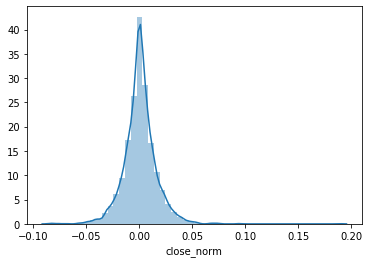

In [8]:
ax = sns.distplot(y_train)
pyplot.show()

In [9]:
from sklearn.ensemble import AdaBoostRegressor

In [10]:
model = AdaBoostRegressor(random_state=0, n_estimators=100)

In [11]:
model.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=100, random_state=0)

In [12]:
model.score(X_train, y_train)

0.7407587103979809

In [13]:
y_pred = model.predict(X_test)
print(model)
#print(model.summary())
print(y_pred)


AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=100, random_state=0)
[ 6.67432747e-04  1.12737861e-03  6.67432747e-04 -1.27973004e-03
  2.39486113e-03  2.23385606e-03  1.10264230e-03  2.23385606e-03
  6.67432747e-04  1.12737861e-03 -6.33461882e-04  2.58393703e-03
  1.26526081e-03 -1.27973004e-03  2.23385606e-03  1.10264230e-03
  6.67432747e-04 -5.90337030e-03  1.26526081e-03  1.26526081e-03
 -7.72401659e-03  2.58393703e-03  4.07769534e-03  2.10539530e-02
  1.26526081e-03  1.26526081e-03  1.12737861e-03  1.26526081e-03
  1.26526081e-03  1.12737861e-03  6.67432747e-04 -3.16705375e-03
 -1.27973004e-03  1.12737861e-03 -7.72401659e-03  1.26526081e-03
  6.35343180e-03  6.67432747e-04  1.12737861e-03 -1.16794324e-03
  7.55344333e-03 -1.16794324e-03  6.67432747e-04  5.16542449e-03
  1.26526081e-03  6.67432747e-04  2.10539530e-02  6.67432747e-04
  1.26526081e-03  6.67432747e-04  3.13546388e-03  2.08518982e-02
  1.91516748e-02  6.67432747e-

In [14]:
from scipy.stats import pearsonr

mse = sklearn.metrics.mean_squared_error(y_test, y_pred)

rmse = math.sqrt(mse)
y_abs = abs(y_test)
rmse_by_mean = rmse/np.mean(y_abs)
print(rmse_by_mean*100)
# calculate Pearson's correlation
corr, _ = pearsonr(y_test, y_pred)
print('Pearsons correlation: %.3f' % corr)

85.2913892181346
Pearsons correlation: 0.824


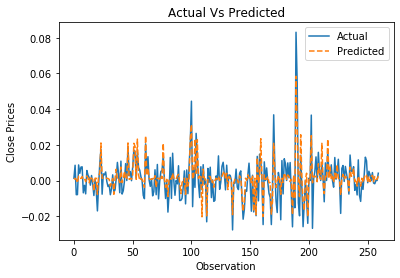

In [14]:
pyplot.title("Actual Vs Predicted")
pyplot.plot(y_test , label='Actual')
pyplot.plot(y_pred , linestyle='dashed' , label='Predicted')
pyplot.legend()
pyplot.xlabel('Observation')
pyplot.ylabel('Close Prices')
pyplot.show()

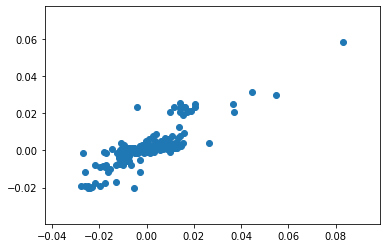

In [15]:
pyplot.scatter(y_test, y_pred)
pyplot.show()

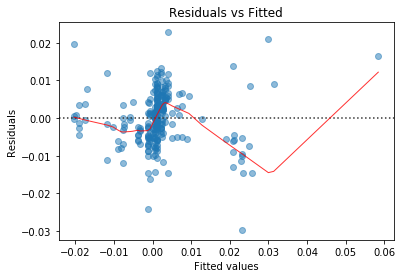

In [16]:
plot_lm_1 = pyplot.figure()
plot_lm_1.axes[0] = sns.residplot(y_pred, test.columns[-5], data=test,
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals');